In [1]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

2018-05-08 22:18:24,394 : INFO : 'pattern' package not found; tag filters are not available for English
/home/nikita/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('/home/nikita/PycharmProjects/natural_language/data/test_prepocess.csv')
data.head()

,stars,text,useful,funny
0,3,The good: mini doughnuts and americano friendl...,1,0
1,3,I really like the décor of the place and the w...,0,0
2,5,"Great service, clean and great food, this plac...",1,0
3,5,This place has never failed on me! \nLate nigh...,0,0
4,2,This is a fast food spin off from Paramount Fi...,1,1


In [3]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
train_batch = train_data[0:100000]
test_batch = test_data[0:50000]

In [4]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [5]:
%%time
train_tagged = train_batch.apply(
    lambda r: TaggedDocument(words=tokenize_text(r.text), tags=[r.stars]), axis=1)

CPU times: user 2min 30s, sys: 447 ms, total: 2min 30s
Wall time: 2min 30s


In [6]:
%%time
test_tagged = test_batch.apply(
    lambda r: TaggedDocument(words=tokenize_text(r.text), tags=[r.stars]), axis=1)

CPU times: user 1min 14s, sys: 316 ms, total: 1min 14s
Wall time: 1min 14s


In [7]:
test_tagged.values[50]

TaggedDocument(words=['3.75', 'stars', 'this', 'place', 'does', "n't", 'really', 'qualify', 'as', 'greasy', 'spoon', 'or', 'diner', 'but', 'it', "'s", 'breakfast', 'special', 'is', 'called', '``', 'the', 'greasy', 'spoon', "''", 'so', 'it', 'counts', 'actually', 'the', '``', 'greasy', 'spoon', 'jr.', "''", 'at', '5.95', 'contains', 'xl', 'eggs', 'choice', 'of', 'side', 'home', 'fries', 'and', 'toast', "''", 'the', '``', 'greasy', 'spoon', 'sr.', "''", 'contains', 'the', 'same', 'as', 'the', 'jr', '...', '.only', 'bigger', 'makes', 'sense', 'the', 'meat', 'options', 'bacon', 'sausage', 'etc', 'qualifies', 'as', 'the', '``', 'side', "''", 'as', 'does', 'home', 'made', 'fruit', 'salad', 'which', 'had', 'nice', 'order', 'at', 'the', 'counter', 'take', 'seat', 'and', 'the', 'friendly', 'staff', 'will', 'deliver', 'your', 'food', 'coffee', 'is', 'self', 'serve', 'but', 'bottomless', 'definitely', 'more', 'of', 'cafe', 'than', 'diner', 'vibe', 'but', 'the', 'breakfast', 'fits', 'the', 'bill']

In [9]:
%%time
trainsent = train_tagged.values
testsent = test_tagged.values

# simple gensim doc2vec api
doc2vec_model = Doc2Vec(trainsent, workers=4, iter=20)

train_targets, train_regressors = zip(
    *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in trainsent])

/home/nikita/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
2018-05-08 22:23:20,427 : INFO : collecting all words and their counts
2018-05-08 22:23:20,428 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-05-08 22:23:20,621 : INFO : PROGRESS: at example #10000, processed 1106108 words (5750650/s), 35280 word types, 6 tags
2018-05-08 22:23:20,814 : INFO : PROGRESS: at example #20000, processed 2195080 words (5679281/s), 51238 word types, 6 tags
2018-05-08 22:23:21,002 : INFO : PROGRESS: at example #30000, processed 3284329 words (5822161/s), 63958 word types, 6 tags
2018-05-08 22:23:21,186 : INFO : PROGRESS: at example #40000, processed 4386759 words (6026628/s), 75710 word types, 6 tags
2018-05-08 22:23:21,381 : INFO : PROGRESS: at ex

2018-05-08 22:24:01,898 : INFO : EPOCH 4 - PROGRESS: at 16.25% examples, 681048 words/s, in_qsize 8, out_qsize 0
2018-05-08 22:24:02,904 : INFO : EPOCH 4 - PROGRESS: at 24.71% examples, 686877 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:24:03,911 : INFO : EPOCH 4 - PROGRESS: at 33.09% examples, 687851 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:24:04,915 : INFO : EPOCH 4 - PROGRESS: at 41.62% examples, 693233 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:24:05,920 : INFO : EPOCH 4 - PROGRESS: at 49.88% examples, 692659 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:24:06,921 : INFO : EPOCH 4 - PROGRESS: at 58.19% examples, 690771 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:24:07,926 : INFO : EPOCH 4 - PROGRESS: at 66.53% examples, 689955 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:24:08,927 : INFO : EPOCH 4 - PROGRESS: at 74.55% examples, 687954 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:24:09,942 : INFO : EPOCH 4 - PROGRESS: at 82.94% examples, 689073 words/s, in_qsiz

2018-05-08 22:24:58,075 : INFO : EPOCH 8 - PROGRESS: at 74.07% examples, 680546 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:24:59,077 : INFO : EPOCH 8 - PROGRESS: at 82.16% examples, 680330 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:25:00,079 : INFO : EPOCH 8 - PROGRESS: at 90.11% examples, 678570 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:25:01,096 : INFO : EPOCH 8 - PROGRESS: at 98.67% examples, 679692 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:25:01,263 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-05-08 22:25:01,288 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-05-08 22:25:01,291 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-05-08 22:25:01,295 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-08 22:25:01,296 : INFO : EPOCH - 8 : training on 10917301 raw words (8336649 effective words) took 12.3s, 677923 effective words/s
2018-05-08 22:25:02,308 : INFO : EPOCH 9 - PR

2018-05-08 22:25:53,518 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-05-08 22:25:53,535 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-08 22:25:53,536 : INFO : EPOCH - 12 : training on 10917301 raw words (8338049 effective words) took 13.3s, 628282 effective words/s
2018-05-08 22:25:54,543 : INFO : EPOCH 13 - PROGRESS: at 7.70% examples, 646245 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:25:55,546 : INFO : EPOCH 13 - PROGRESS: at 15.31% examples, 643109 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:25:56,563 : INFO : EPOCH 13 - PROGRESS: at 22.89% examples, 634271 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:25:57,566 : INFO : EPOCH 13 - PROGRESS: at 30.35% examples, 630097 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:25:58,570 : INFO : EPOCH 13 - PROGRESS: at 38.14% examples, 633623 words/s, in_qsize 8, out_qsize 0
2018-05-08 22:25:59,570 : INFO : EPOCH 13 - PROGRESS: at 45.54% examples, 632222 words/s, in_qsize 7, out_qsi

2018-05-08 22:26:48,668 : INFO : EPOCH 17 - PROGRESS: at 22.98% examples, 634623 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:26:49,696 : INFO : EPOCH 17 - PROGRESS: at 30.53% examples, 628410 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:26:50,700 : INFO : EPOCH 17 - PROGRESS: at 38.14% examples, 629108 words/s, in_qsize 8, out_qsize 0
2018-05-08 22:26:51,705 : INFO : EPOCH 17 - PROGRESS: at 45.91% examples, 632958 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:26:52,714 : INFO : EPOCH 17 - PROGRESS: at 52.42% examples, 618618 words/s, in_qsize 8, out_qsize 0
2018-05-08 22:26:53,716 : INFO : EPOCH 17 - PROGRESS: at 59.31% examples, 612082 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:26:54,727 : INFO : EPOCH 17 - PROGRESS: at 66.24% examples, 607164 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:26:55,728 : INFO : EPOCH 17 - PROGRESS: at 74.16% examples, 612777 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:26:56,747 : INFO : EPOCH 17 - PROGRESS: at 81.37% examples, 610963 words/s

CPU times: user 16min 26s, sys: 24.6 s, total: 16min 51s
Wall time: 9min 37s


In [10]:
%%time
test_targets, test_regressors = zip(
    *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in testsent])

CPU times: user 2min 45s, sys: 304 ms, total: 2min 46s
Wall time: 2min 46s


In [11]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy                     %s' % accuracy_score(target, predictions))
    print('explained_variance_score     %s' % explained_variance_score(target, predictions))
    print('mean_absolute_error          %s' % mean_absolute_error(target, predictions))
    print('mean_squared_error           %s' % mean_squared_error(target, predictions))
    print('mean_squared_log_error       %s' % mean_squared_log_error(target, predictions))
    print('r2_score                     %s' % r2_score(target, predictions))
    print()
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')
    
def plot_confusion_matrix(cm, title='Матрица ошибок', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    my_tags = pd.unique(train_batch.stars)
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('Исходные метки')
    plt.xlabel('Полученные метки')
    
def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data.text)
    predictions = classifier.predict(data_features)
    target = data.stars
    evaluate_prediction(predictions, target)

accuracy                     0.52836
explained_variance_score     0.15314269974676253
mean_absolute_error          0.83128
mean_squared_error           1.98928
mean_squared_log_error       0.13538298127558265
r2_score                     0.024468198720961065

confusion matrix
 [[ 3651    94   170   515  2444]
 [ 1302   177   364   760  1453]
 [  756   112   543  1731  2780]
 [  448    49   301  2611  8299]
 [  402    14    69  1519 19436]]
(row=expected, col=predicted)
CPU times: user 9.29 s, sys: 91 ms, total: 9.38 s
Wall time: 9.22 s


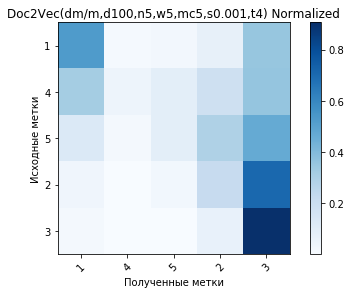

In [12]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_regressors, train_targets)
evaluate_prediction(logreg.predict(test_regressors), test_targets, title=str(doc2vec_model))